In [23]:
import csv
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [24]:
current_path = Path.cwd()
current_path 
project_path = Path.cwd().parent
data_path = project_path/"Data"
data_file = data_path/'ESP_PUBLIC.IDENTITE_ARBRE.csv'

#### Import data using Pandas

In [25]:
# Import raw data from CSV file using Pandas command pandas.read_csv
df_raw_data = pd.read_csv(data_file,sep=',', header = 0, 
                 index_col=False,names=None, encoding = "utf-8")
print(type(df_raw_data))
print(len(df_raw_data))

# Show df raw data
df_raw_data.columns


<class 'pandas.core.frame.DataFrame'>
31892


Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE',
       'GeoJSON'],
      dtype='object')

In [26]:
#creating a new DataFrame with only several colums 
df_annee = df_raw_data[['ANNEEDEPLANTATION']]
df_annee.shape

(31892, 1)

### 1. Lire les deux premières ligne du csv des arbres de Grenoble (module csv, voir doc officielle). Que représentent elles ?
La réponse:

Le 1er ligne est les noms des toutes les catagories comme les arbes
Le 2emem ligne est les raw-data d'un arbe

In [27]:
df_raw_data.head(1)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,16750,ESP19318,ESP19318,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7394161255246..."


### 2. Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List
La réponse:
Le fait dans numpy array: "df_anne"

### 3. Afficher les 50 premières lignes et les 50 dernières lignes de cette liste.

In [28]:
print(df_annee.head(50))
print(df_annee.tail(50))

    ANNEEDEPLANTATION
0              1975.0
1              1975.0
2              2001.0
3              1975.0
4              2006.0
5              1975.0
6              1975.0
7              1975.0
8              1975.0
9              2001.0
10             2001.0
11             1975.0
12             1975.0
13             2001.0
14             2001.0
15             2001.0
16             1975.0
17             1975.0
18             1975.0
19             1975.0
20             2001.0
21             2001.0
22             2001.0
23             2001.0
24             2001.0
25             2001.0
26             2001.0
27             1975.0
28             2006.0
29             1975.0
30             1975.0
31             1975.0
32             2001.0
33             1975.0
34             2001.0
35             2006.0
36             1975.0
37             1975.0
38             1975.0
39             1975.0
40             2001.0
41             2001.0
42             1975.0
43             1975.0
44        

### 4. Pour combien d’arbres manque-t-il l’information concernant la date de plantation ?
La réponse: 763

In [60]:
df_annee = df_raw_data['ANNEEDEPLANTATION']
#print(df_annee.shape)
print(df_annee.isnull().sum())

763


In [48]:
# Find out all the integer index of "Null" elements in the 1D DataFram df_annee:
df_annee.loc[pd.isnull(df_annee['ANNEEDEPLANTATION']), :].index

# Another Way:
#df_raw_data.loc[pd.isnull(df_raw_data['ANNEEDEPLANTATION']), :].index

Int64Index([  319,   320,   847,   924,   978,  1167,  1168,  1169,  1170,
             1463,
            ...
            31351, 31459, 31635, 31636, 31637, 31638, 31767, 31768, 31769,
            31770],
           dtype='int64', length=763)

### 5. Extraire l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List
La réponse: 

In [86]:
#df_raw_data['ANNEEDEPLANTATION']

In [74]:
new_row_data = df_raw_data.loc[range(df_raw_data.shape[0]),['ANNEEDEPLANTATION']]

In [85]:
# Access a certain row, e.g. the 200th row 
df_raw_data[200:201]

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
200,31933,ESP32659,ESP32659,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407048912734..."


In [91]:
new_row_list = df_raw_data[200:201].values.tolist()

In [107]:
print(new_row_list)

[[31933, 'ESP32659', 'ESP32659', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP174', "Arbre d'espaces ouverts", 'ESP995', 'Prc Echangeurs Bastion St Roch', 5, 'AR32659', 'Acer', 'pseudoplatanus', nan, 'Arbre adulte', nan, nan, 2001.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Ville de Grenoble', '{"type":"Point","coordinates":[5.74070489127344,45.190667852803]}']]


In [146]:
# Add index to rows:
new_row_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            31882, 31883, 31884, 31885, 31886, 31887, 31888, 31889, 31890,
            31891],
           dtype='int64', length=31892)

### 6. Combien d’arbres sont recensés dans ce jeu de données ?  
La réponse: 31892

In [132]:
df_raw_data['ANNEEDEPLANTATION'].shape[0]

31892

### 7. Combien d’arbres ont été plantés en moyenne chaque année ? 
La réponse: 506 (totale) ou 502 (sans les arbes qui n'ont pas des années)

In [238]:
#List unique values in the df['ANNEEDEPLANTATION'] (eleminate the NaN element) column
# Using pd.DataFrame.value_counts(dropna = True, sort = True)
unique_years_values = df_raw_data['ANNEEDEPLANTATION'].unique()
occurance_years_NNan = df_raw_data['ANNEEDEPLANTATION'].value_counts(dropna=True, sort=True)

In [280]:
#Convert occurance_years_NNan to DataFrame
print(type(occurance_years_NNan))
df_occurance_years_NNan= pd.DataFrame(occurance_years_NNan)
df_occurance_years_NNan = df_occurance_years_NNan.reset_index()
df_occurance_years_NNan.columns = ['ANNEEDEPLANTATION', 'COUNTS'] # change column names

<class 'pandas.core.series.Series'>


In [233]:
df_occurance_years_NNan['COUNTS'].mean()

502.0806451612903

### 8.Afficher tous les arbres ayant été plantés l’année de votre naissance.
La Répondse: 304

In [249]:
df_occurance_years_NNan.loc[df_occurance_years_NNan['ANNEEDEPLANTATION']==1983]["COUNTS"]

38    304
Name: COUNTS, dtype: int64

### 9. Combien d’arbres ont été plantés depuis votre naissance ?
La Répondse: 17824

In [262]:
def accumulate_sum(DataFrame, Year, Index= 'ANNEEDEPLANTATION', CountName = 'COUNTS'):
    """ return a number which is the sum over all the trees planted in the data base
         the 'DataFrame' of the chosen input 'Year'
    """ 
    return DataFrame.loc[DataFrame[Index]>= Year][CountName].sum()

In [263]:
accumulate_sum(df_occurance_years_NNan, 1983)

17365

In [273]:
## Another way to calculate:
df_raw_data.loc[(df_raw_data['ANNEEDEPLANTATION'] >= 1983) 
                & (df_raw_data['ANNEEDEPLANTATION'].notnull())]['ANNEEDEPLANTATION'].count()

17365

### 10. Quel Maire a planté le plus d’arbres à Grenoble ?
La Répondse: Le Mairie de 1

### 11. Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.

<class 'pandas.core.frame.DataFrame'>


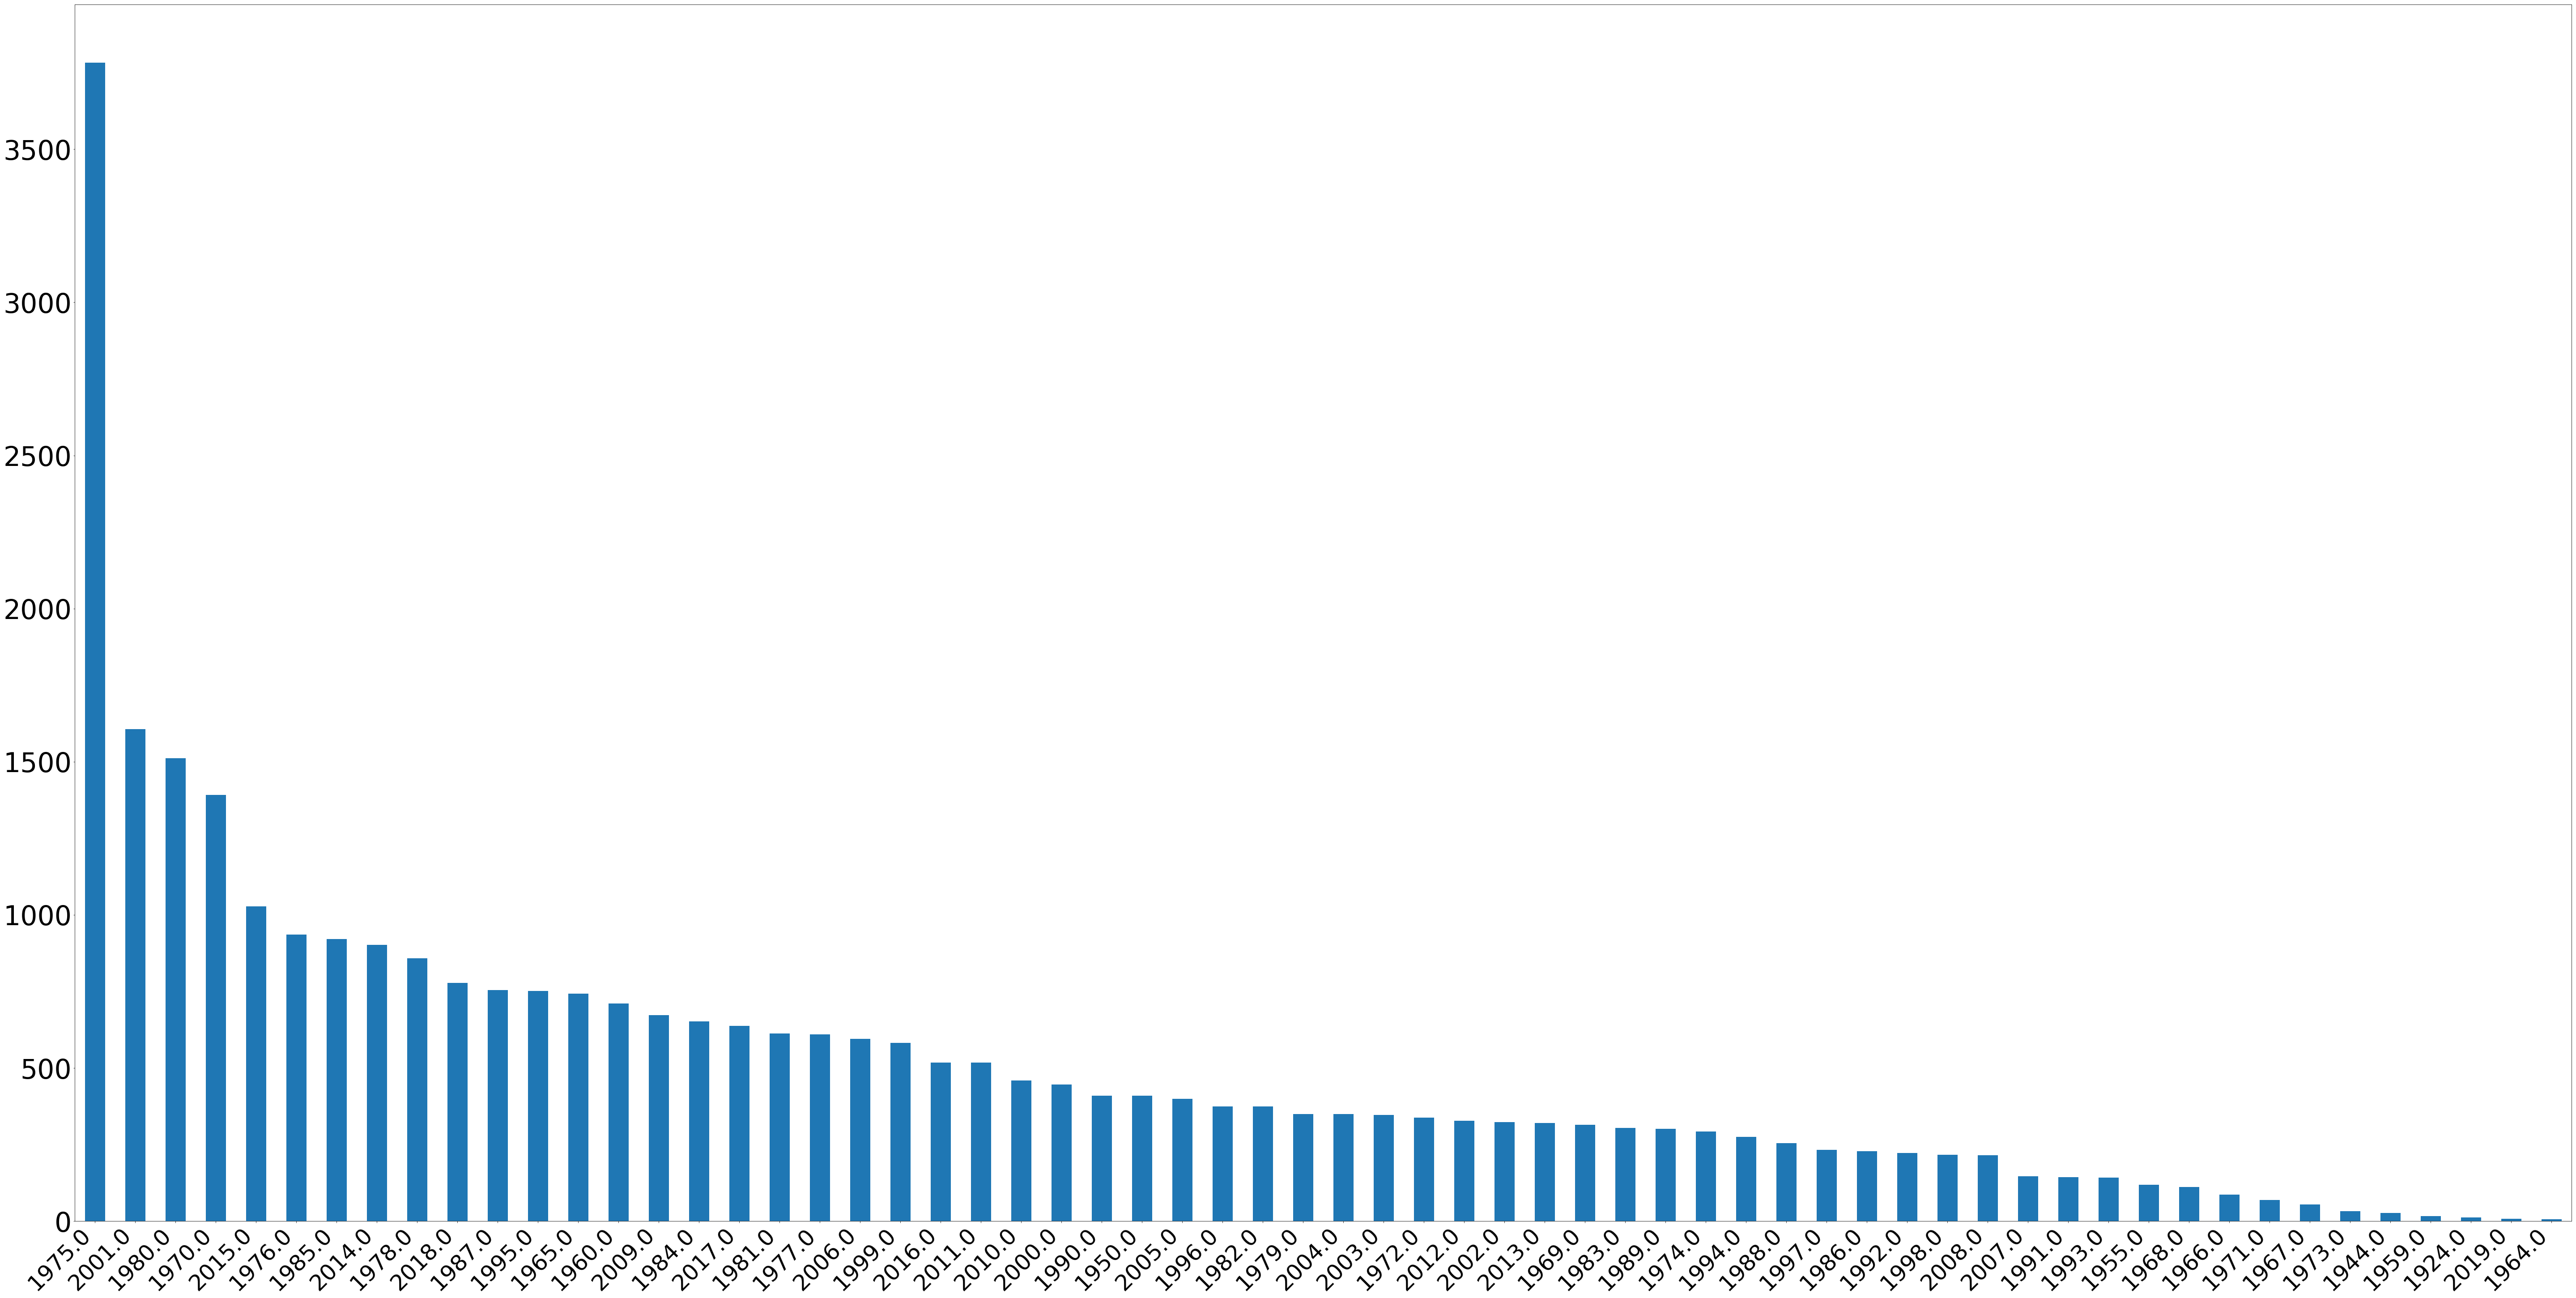

In [285]:
%matplotlib inline

#unique_years_values = df_raw_data['ANNEEDEPLANTATION'].unique()
occurance = df_raw_data['ANNEEDEPLANTATION'].value_counts(dropna=True, sort=True)

#plt.bar(list(list_x_annes) , list(list_y_counts))
plt.figure(figsize=(100,50))
occurance.plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=50)
plt.yticks(fontsize=60)
plt.show()

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.]), <a list of 9 Text yticklabel objects>)

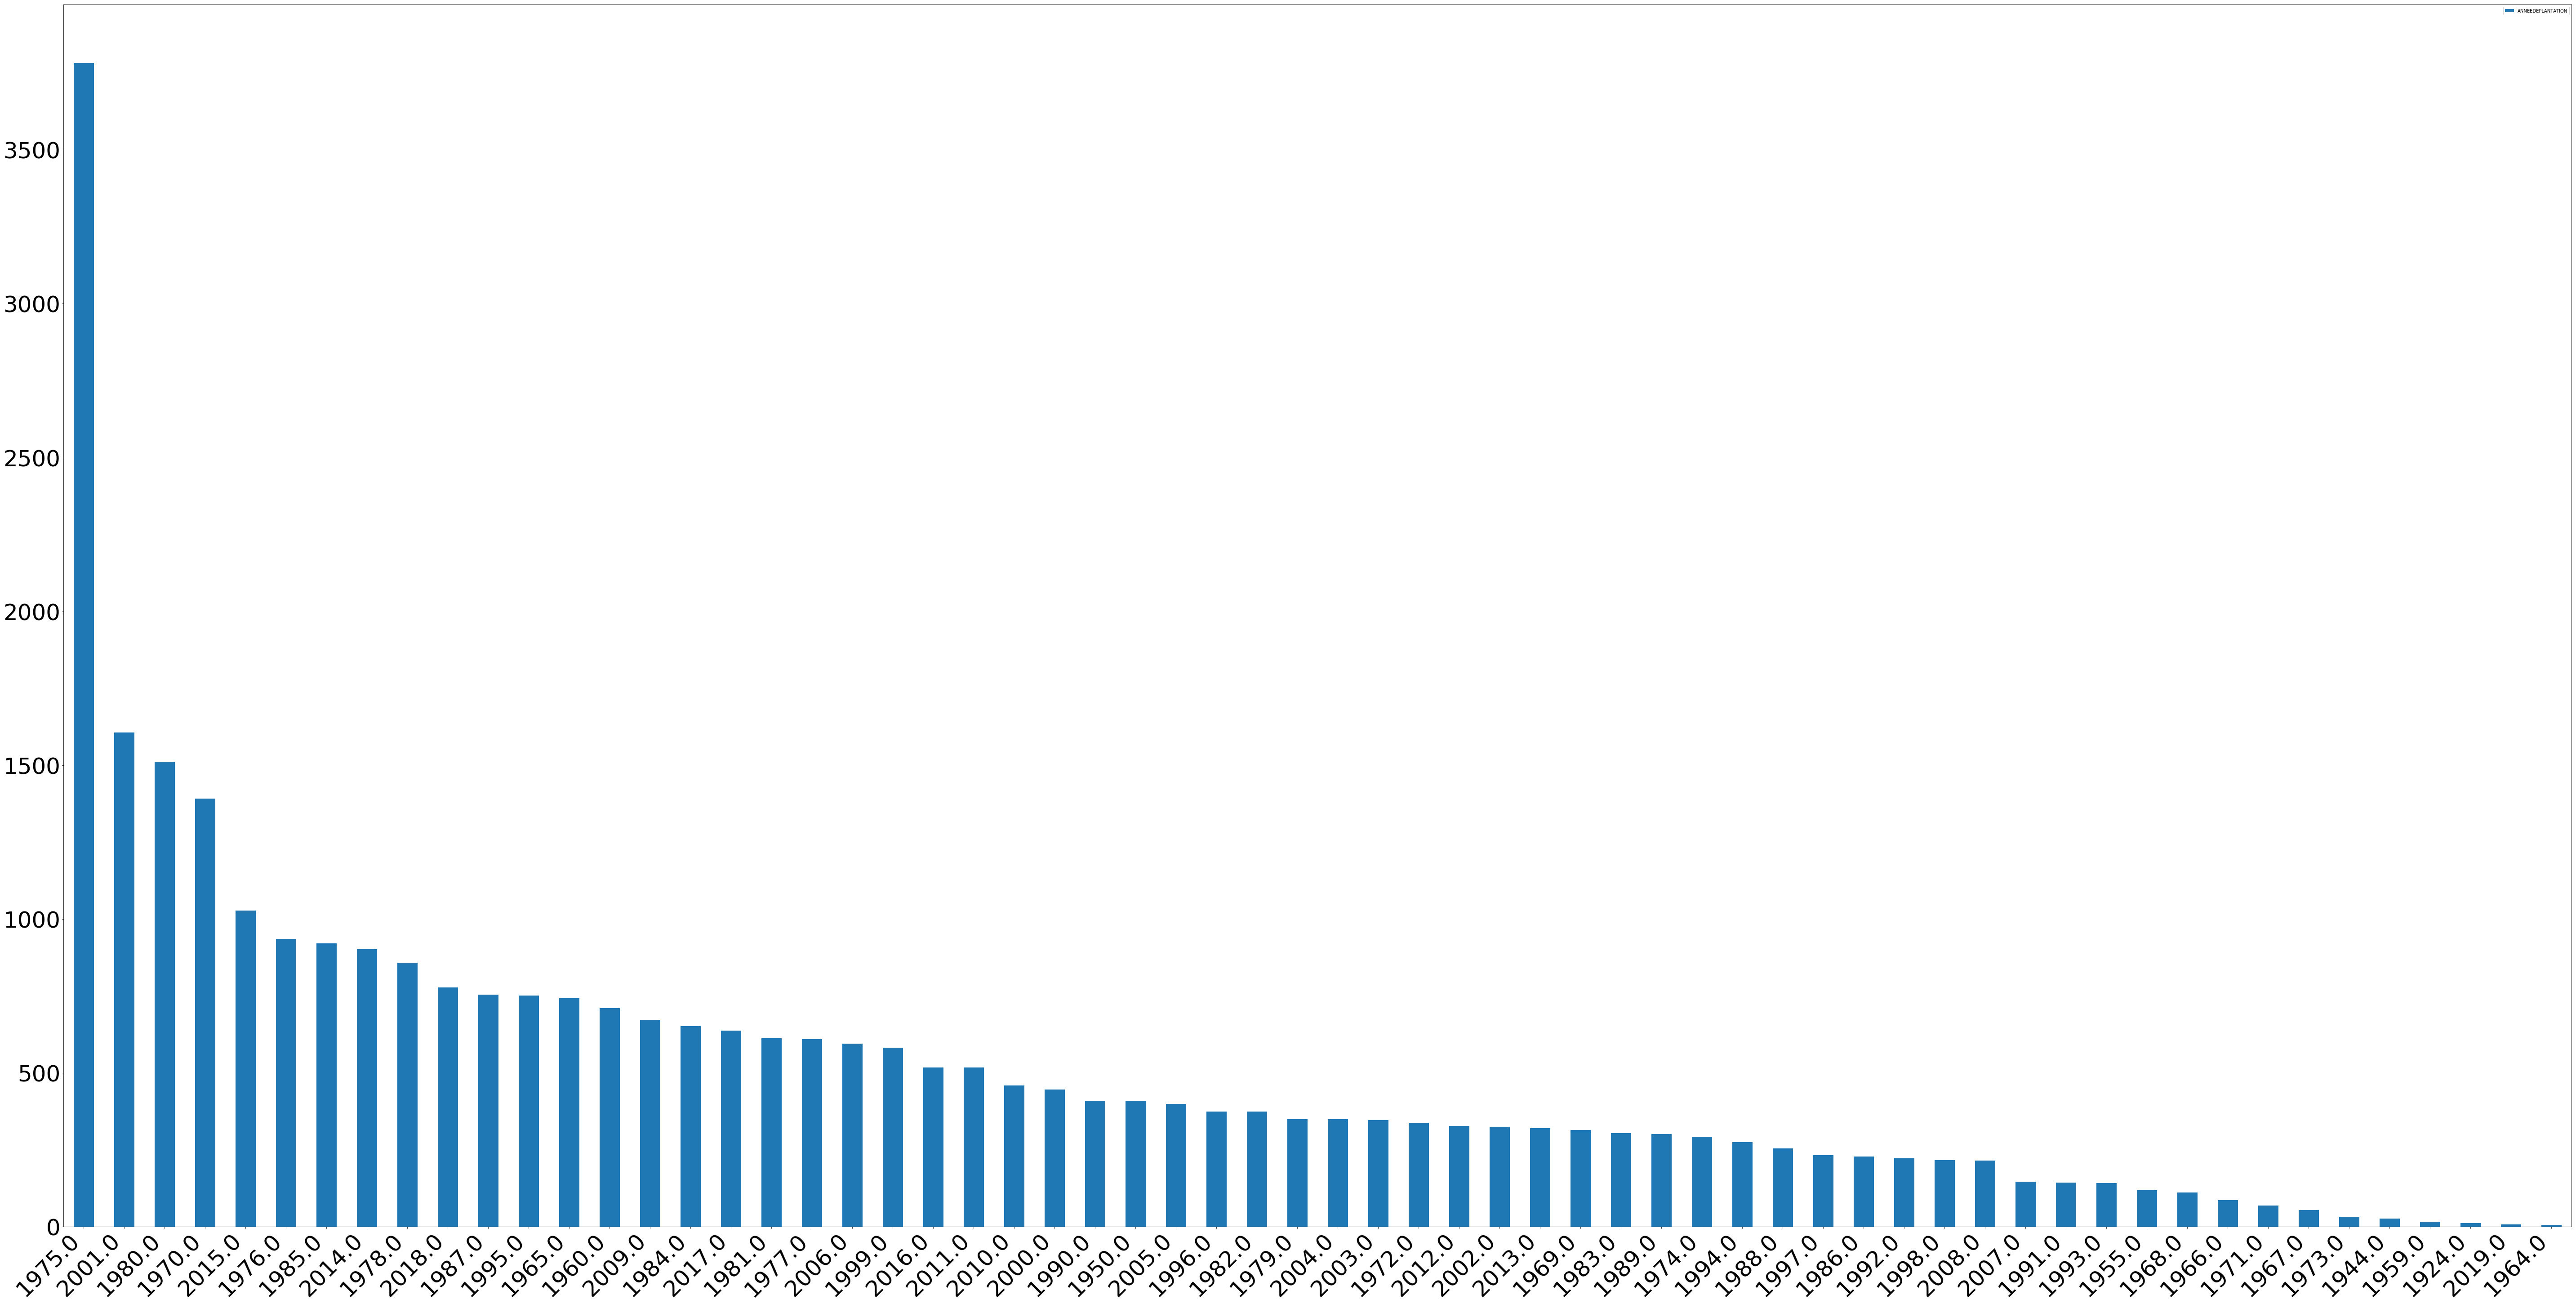

In [302]:
%matplotlib inline

df_occurance = pd.DataFrame(occurance)

fig, ax = plt.subplots(figsize=(100,50))
df_occurance.plot(ax=ax, kind = 'bar')
plt.xticks(Rotation=45, horizontalalignment='right', fontsize=50)
plt.yticks(fontsize=50)


### 12. Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste. 